## Importamos librerías

In [31]:
import numpy as np
import matplotlib.pyplot as plt



## Definimos funciones
La ecuación f(x)
y la derivada de esta funciones que la llamaremos df(x), para el método de Newton Raphson.

In [32]:

def f(x):
    return np.log(x**2 + 1) - (np.exp(x / 2) * np.cos(np.pi * x))


def df(x):
    return (2*x / (x**2 + 1)) - (0.5 * np.exp(x / 2) * np.cos(np.pi * x)) + (np.exp(x / 2) * np.pi * np.sin(np.pi * x))


## Para el método de Newton Raphson y con sus respectivos gráficos


In [33]:

def mnr(x0, tol, max_iter=1000):
    x_i = x0
    iteraciones = []
    for i in range(max_iter):
        f_xi = f(x_i)
        df_xi = df(x_i)
        x_i1 = x_i - f_xi / df_xi
        error = abs(x_i1 - x_i)
        iteraciones.append(x_i1)
        print(f"Iteración {i+1}: f(x_i) = {f_xi:.6f}, f'(x_i) = {df_xi:.6f}, x_i+1 = {x_i1:.6f}, Error = {error:.6e}")
        if error < tol:
            break
        x_i = x_i1
    return x_i1, iteraciones


## Para el método de la secante con sus respectivos gráficos

In [34]:

def sec(x0, x1, tol, max_iter=1000):
    iteraciones = []
    for i in range(max_iter):
        f_x0 = f(x0)
        f_x1 = f(x1)
        x_n2 = x1 - f_x1 * (x1 - x0) / (f_x1 - f_x0)
        error = abs(x_n2 - x1)
        iteraciones.append(x_n2)
        print(f"Iteración {i+1}: f(x_i) = {f_x1:.6f}, x_i+1 = {x_n2:.6f}, Error = {error:.6e}")
        if error < tol:
            break
        x0 = x1
        x1 = x_n2
    return x_n2, iteraciones


## Parámetros de cada método e impresiones de las respuestas

Método de Newton Raphson:
Iteración 1: f(x_i) = 0.724614, f'(x_i) = 5.124069, x_i+1 = 0.458586, Error = 1.414138e-01
Iteración 2: f(x_i) = 0.027696, f'(x_i) = 4.594038, x_i+1 = 0.452558, Error = 6.028654e-03
Iteración 3: f(x_i) = 0.000121, f'(x_i) = 4.553801, x_i+1 = 0.452531, Error = 2.649038e-05
Iteración 4: f(x_i) = 0.000000, f'(x_i) = 4.553621, x_i+1 = 0.452531, Error = 5.226324e-10

Raíz encontrada por Newton Raphson: 0.452531

Método de la Secante:
Iteración 1: f(x_i) = 0.980753, x_i+1 = 0.458550, Error = 1.914496e-01
Iteración 2: f(x_i) = 0.027531, x_i+1 = 0.453021, Error = 5.529554e-03
Iteración 3: f(x_i) = 0.002231, x_i+1 = 0.452533, Error = 4.876448e-04
Iteración 4: f(x_i) = 0.000010, x_i+1 = 0.452531, Error = 2.159699e-06
Iteración 5: f(x_i) = 0.000000, x_i+1 = 0.452531, Error = 7.872284e-10

Raíz encontrada por la Secante: 0.452531


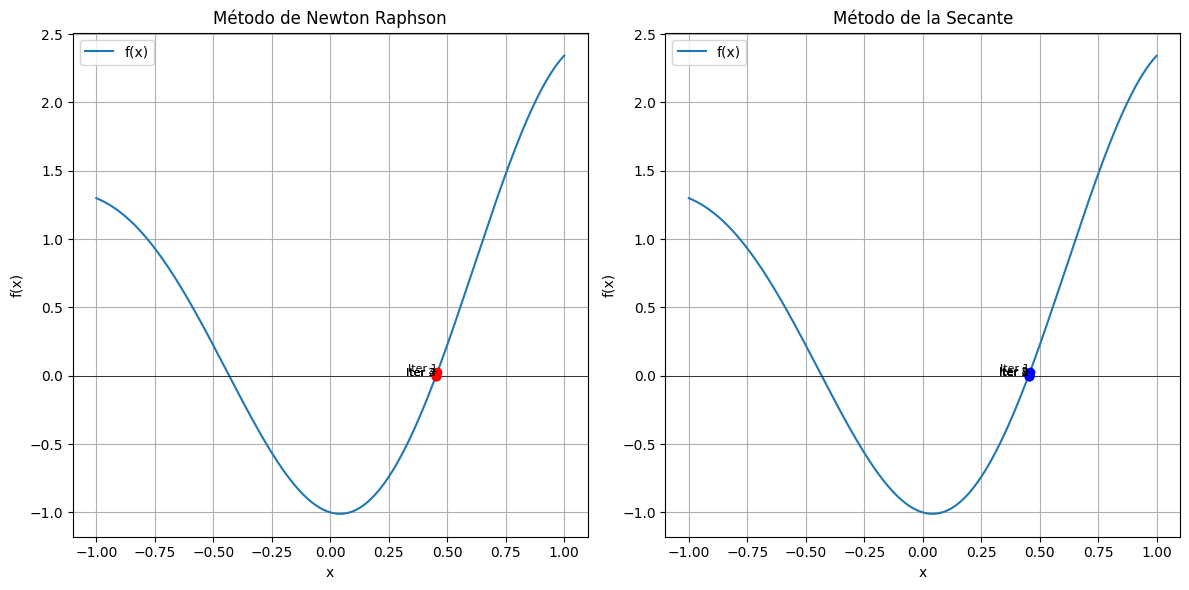

In [35]:
# Parámetros de Newton Raphson
tol= 1e-6
x0_mnr=0.6


x0_sec = 0.6
x1_sec = 0.65

# Método de Newton Raphson
print("Método de Newton Raphson:")
raiz_mnr, iteraciones_newton = mnr(x0_mnr, tol)
print(f"\nRaíz encontrada por Newton Raphson: {raiz_mnr:.6f}")

# Método de la Secante
print("\nMétodo de la Secante:")
raiz_secante, iteraciones_secante = sec(x0_sec, x1_sec, tol)
print(f"\nRaíz encontrada por la Secante: {raiz_secante:.6f}")

# Graficar la función y las iteraciones
x_vals = np.linspace(-1, 1, 400)
y_vals = f(x_vals)

# Gráfico para Newton-Raphson
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x_vals, y_vals, label="f(x)")
plt.axhline(0, color='black', lw=0.5)
plt.title('Método de Newton Raphson')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
for i, xn in enumerate(iteraciones_newton):
    plt.plot(xn, f(xn), 'ro')  # Marca las aproximaciones
    plt.text(xn, f(xn), f'Iter {i+1}', fontsize=8, ha='right')
plt.legend()

# Gráfico para la Secante
plt.subplot(1, 2, 2)
plt.plot(x_vals, y_vals, label="f(x)")
plt.axhline(0, color='black', lw=0.5)
plt.title('Método de la Secante')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
for i, xn in enumerate(iteraciones_secante):
    plt.plot(xn, f(xn), 'bo')  # Marca las aproximaciones
    plt.text(xn, f(xn), f'Iter {i+1}', fontsize=8, ha='right')
plt.legend()

plt.tight_layout()
plt.show()